In [8]:
import acquire
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [9]:
df = acquire.get_wine()

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [11]:
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples,
    a test, which is 20% of the entire dataframe,
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe.
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable.
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test.
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target, 'type'])
    y_train = train[target]
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target, 'type'])
    y_validate = validate[target]
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target, 'type'])
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [12]:
def train_validate_test_dummy(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples,
    a test, which is 20% of the entire dataframe,
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe.
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable.
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test.
    '''
    df_dummies = pd.get_dummies(df.type, drop_first=True)
    # Concatenate the original DataFrame and the dummy variables DataFrame
    df = pd.concat([df, df_dummies], axis=1)
    
    df = df.drop(columns=['type'])
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test


In [13]:
X_train

NameError: name 'X_train' is not defined

In [14]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test_dummy(df, 'quality')

In [15]:
y_train

2138    5
19      6
601     6
2540    5
501     7
       ..
3319    5
1943    5
285     5
607     5
548     6
Name: quality, Length: 3637, dtype: int64

In [16]:
def scale_data(X_train, X_validate, X_test):
    scaler = MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    
    #Turn array back into dataframe and rename to original columns
    columns = X_train.columns #List of Columns
    numbers = [0,1,2,3,4,5,6,7,8,9,10] #List of numbers for the scaled np array I'm converting into a dataframe
    zipped= dict(zip(numbers, columns))
    X_train_scaled = pd.DataFrame(X_train_scaled).rename(columns=zipped)
    X_validate_scaled = pd.DataFrame(X_validate_scaled).rename(columns=zipped)
    X_test_scaled = pd.DataFrame(X_test_scaled).rename(columns=zipped)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test)

In [17]:
columns = X_train.columns #List of Columns
numbers = [0,1,2,3,4,5,6,7,8,9,10,11] #List of numbers for the scaled np array I'm converting into a dataframe
zipped= dict(zip(numbers, columns))
X_train_scaled = pd.DataFrame(X_train_scaled).rename(columns=zipped)
X_validate_scaled = pd.DataFrame(X_validate_scaled).rename(columns=zipped)
X_test_scaled = pd.DataFrame(X_test_scaled).rename(columns=zipped)

In [18]:
X_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
0,0.140496,0.106667,0.192771,0.124233,0.080268,0.062500,0.219400,0.132832,0.417323,0.050562,0.347826,1.0
1,0.338843,0.160000,0.307229,0.018405,0.550167,0.055556,0.113164,0.188741,0.236220,0.483146,0.173913,0.0
2,0.280992,0.106667,0.240964,0.012270,0.055184,0.104167,0.228637,0.082707,0.110236,0.089888,0.405797,1.0
3,0.429752,0.140000,0.204819,0.176380,0.030100,0.114583,0.392610,0.191826,0.307087,0.140449,0.376812,1.0
4,0.545455,0.240000,0.439759,0.091258,0.103679,0.128472,0.159353,0.229227,0.338583,0.353933,0.579710,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.107438,0.086667,0.168675,0.012270,0.058528,0.163194,0.325635,0.088105,0.598425,0.151685,0.347826,1.0
3633,0.206612,0.113333,0.265060,0.168712,0.048495,0.163194,0.434180,0.186813,0.346457,0.168539,0.217391,1.0
3634,0.289256,0.160000,0.150602,0.101227,0.073579,0.159722,0.399538,0.173318,0.267717,0.140449,0.115942,1.0
3635,0.289256,0.113333,0.174699,0.105828,0.061873,0.128472,0.348730,0.181029,0.543307,0.089888,0.231884,1.0


In [19]:
feature_list = []
for i in range(2,5):
    
    from sklearn.feature_selection import SelectKBest, f_regression

    # parameters: f_regression stats test, give me i features
    f_selector = SelectKBest(f_regression, k=i)

    # find the top 8 X's correlated with y
    f_selector.fit(X_train, y_train)

    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()

    # get list of top K features. 
    f_feature = X_train.iloc[:,feature_mask].columns.tolist()
    
    feature_list.append(f_feature)

    #print features
    print(f_feature)

['density', 'alcohol']
['volatile acidity', 'density', 'alcohol']
['volatile acidity', 'chlorides', 'density', 'alcohol']


In [20]:
X_validate_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
0,0.247934,0.100000,0.192771,0.015337,0.023411,0.145833,0.323326,0.063428,0.433071,0.179775,0.652174,1.0
1,0.256198,0.206667,0.144578,0.023006,0.150502,0.010417,0.000000,0.144785,0.551181,0.202247,0.492754,0.0
2,0.446281,0.300000,0.144578,0.030675,0.110368,0.093750,0.304850,0.207634,0.370079,0.196629,0.217391,0.0
3,0.198347,0.180000,0.024096,0.009202,0.080268,0.076389,0.233256,0.121265,0.409449,0.179775,0.173913,1.0
4,0.479339,0.160000,0.283133,0.012270,0.073579,0.027778,0.039261,0.189705,0.377953,0.337079,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.429752,0.106667,0.301205,0.009202,0.060201,0.086806,0.230947,0.090418,0.370079,0.067416,0.637681,1.0
1556,0.429752,0.080000,0.198795,0.044479,0.061873,0.031250,0.076212,0.140544,0.314961,0.078652,0.260870,1.0
1557,0.305785,0.200000,0.343373,0.026074,0.157191,0.013889,0.011547,0.172354,0.488189,0.185393,0.492754,0.0
1558,0.256198,0.073333,0.198795,0.015337,0.045151,0.090278,0.210162,0.051860,0.275591,0.134831,0.623188,1.0


In [21]:
feature_list

[['density', 'alcohol'],
 ['volatile acidity', 'density', 'alcohol'],
 ['volatile acidity', 'chlorides', 'density', 'alcohol']]

In [22]:
X_train_2_features = X_train_scaled[feature_list[0]]
X_train_2_features
X_validate_2_features = X_validate_scaled[feature_list[0]]
X_validate_2_features

,density,alcohol
0,0.063428,0.652174
1,0.144785,0.492754
2,0.207634,0.217391
3,0.121265,0.173913
4,0.189705,0.333333
...,...,...
1555,0.090418,0.637681
1556,0.140544,0.260870
1557,0.172354,0.492754
1558,0.051860,0.623188


In [23]:
# X_train_3_features = X_train_scaled[feature_list[1]]
# X_train_3_features

X_train_3_features = X_train_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]
X_train_3_features
X_validate_3_features = X_validate_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]
X_validate_3_features

,residual sugar,total sulfur dioxide,alcohol
0,0.015337,0.323326,0.652174
1,0.023006,0.000000,0.492754
2,0.030675,0.304850,0.217391
3,0.009202,0.233256,0.173913
4,0.012270,0.039261,0.333333
...,...,...,...
1555,0.009202,0.230947,0.637681
1556,0.044479,0.076212,0.260870
1557,0.026074,0.011547,0.492754
1558,0.015337,0.210162,0.623188


In [24]:
X_train_4_features = X_train_scaled[feature_list[2]]
X_train_4_features
X_validate_4_features = X_validate_scaled[feature_list[2]]
X_validate_4_features

,volatile acidity,chlorides,density,alcohol
0,0.100000,0.023411,0.063428,0.652174
1,0.206667,0.150502,0.144785,0.492754
2,0.300000,0.110368,0.207634,0.217391
3,0.180000,0.080268,0.121265,0.173913
4,0.160000,0.073579,0.189705,0.333333
...,...,...,...,...
1555,0.106667,0.060201,0.090418,0.637681
1556,0.080000,0.061873,0.140544,0.260870
1557,0.200000,0.157191,0.172354,0.492754
1558,0.073333,0.045151,0.051860,0.623188


In [25]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(X_train_2_features)

X_train['2_cluster'] = kmeans2.predict(X_train_2_features)
X_validate['2_cluster'] = kmeans2.predict(X_validate_2_features)

In [26]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,3
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1


In [27]:
X_validate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster
497,6.8,0.23,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,1,2
813,6.9,0.39,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,0,3
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,0,1
439,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,1,1
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,9.0,0.24,0.50,1.2,0.048,26.0,107.0,0.99180,3.21,0.34,12.4,1,2
4522,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,1,0
1507,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,0,3
1395,6.9,0.19,0.33,1.6,0.039,27.0,98.0,0.98980,3.09,0.46,12.3,1,2


In [28]:
kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(X_train_3_features)

X_train['3_cluster'] = kmeans3.predict(X_train_3_features)
X_validate['3_cluster'] = kmeans3.predict(X_validate_3_features)

In [29]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,3,1
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,1
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1,2
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1,2
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1,2


In [30]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_train_4_features)

X_train['4_cluster'] = kmeans4.predict(X_train_4_features)
X_validate['4_cluster'] = kmeans4.predict(X_validate_4_features)

In [31]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,1,2
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,3,1,2
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,1,2
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,1,2
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1,2,3
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1,2,3
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1,2,3


In [32]:
X_validate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
497,6.8,0.23,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,1,2,3,1
813,6.9,0.39,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,0,3,0,2
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,0,1,2,0
439,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,1,1,0,3
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,9.0,0.24,0.50,1.2,0.048,26.0,107.0,0.99180,3.21,0.34,12.4,1,2,3,1
4522,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,1,0,0,3
1507,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,0,3,0,2
1395,6.9,0.19,0.33,1.6,0.039,27.0,98.0,0.98980,3.09,0.46,12.3,1,2,3,1


In [33]:
#Recombine the Trains in order to see if I chan chi square the results

In [34]:
pd.DataFrame(y_train)
recombined_train = pd.concat([X_train, y_train], axis=1)
recombined_train.groupby('2_cluster').quality.median()

2_cluster
0    6.0
1    5.0
2    7.0
3    6.0
Name: quality, dtype: float64

In [35]:
cluster2 = pd.crosstab(recombined_train.quality, recombined_train['2_cluster'])#, recombined_train['3_cluster'], recombined_train['4_cluster']])

In [36]:
cluster2

2_cluster,0,1,2,3
quality,,,,
3,7,7,1,4
4,31,47,6,27
5,345,675,28,151
6,488,459,231,432
7,90,65,225,208
8,11,12,59,26
9,1,0,1,0


In [37]:
chi2, p, degf, expected = stats.chi2_contingency(cluster2)
chi2, p

(907.2517735520067, 4.4519742686720706e-181)

In [38]:
cluster3 = pd.crosstab(recombined_train.quality, recombined_train['3_cluster'])

In [39]:
cluster3

3_cluster,0,1,2,3
quality,,,,
3,7,2,9,1
4,38,25,35,13
5,408,190,552,49
6,350,479,471,310
7,61,184,73,270
8,3,31,12,62
9,0,1,0,1


In [40]:
chi2, p, degf, expected = stats.chi2_contingency(cluster3)
chi2, p

(804.6644559964388, 3.229920734992249e-159)

<Axes: xlabel='quality'>

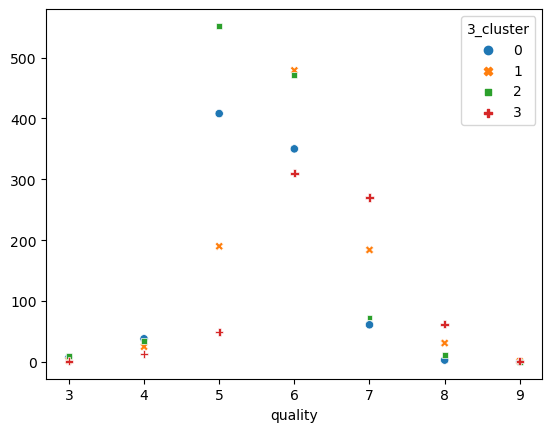

In [41]:
sns.scatterplot(cluster3)

In [42]:
cluster4 = pd.crosstab(recombined_train.quality, recombined_train['4_cluster'])

<Axes: xlabel='quality'>

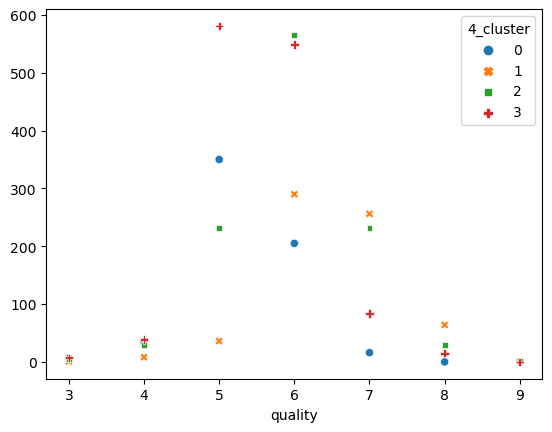

In [43]:
sns.scatterplot(cluster4)

In [44]:
cluster4

4_cluster,0,1,2,3
quality,,,,
3,6,1,5,7
4,35,8,29,39
5,350,36,232,581
6,205,290,566,549
7,16,256,232,84
8,0,64,29,15
9,0,1,1,0


In [45]:
chi2, p, degf, expected = stats.chi2_contingency(cluster4)
chi2, p

(930.6833308385646, 4.455045434759915e-186)

In [46]:
# X_train_2 = X_train.drop(columns=['3_cluster', '4_cluster'])

In [47]:
sns.pairplot(X_train_2, x_vars=['density', 'alcohol'], y_vars=['density', 'alcohol'], hue='2_cluster')

NameError: name 'X_train_2' is not defined

In [48]:
sns.pairplot(X_train_2, x_vars=['density', 'alcohol'], y_vars=['density', 'alcohol'], hue='white')

NameError: name 'X_train_2' is not defined

In [49]:
X_train_3 = X_train.drop(columns=['2_cluster', '4_cluster'])

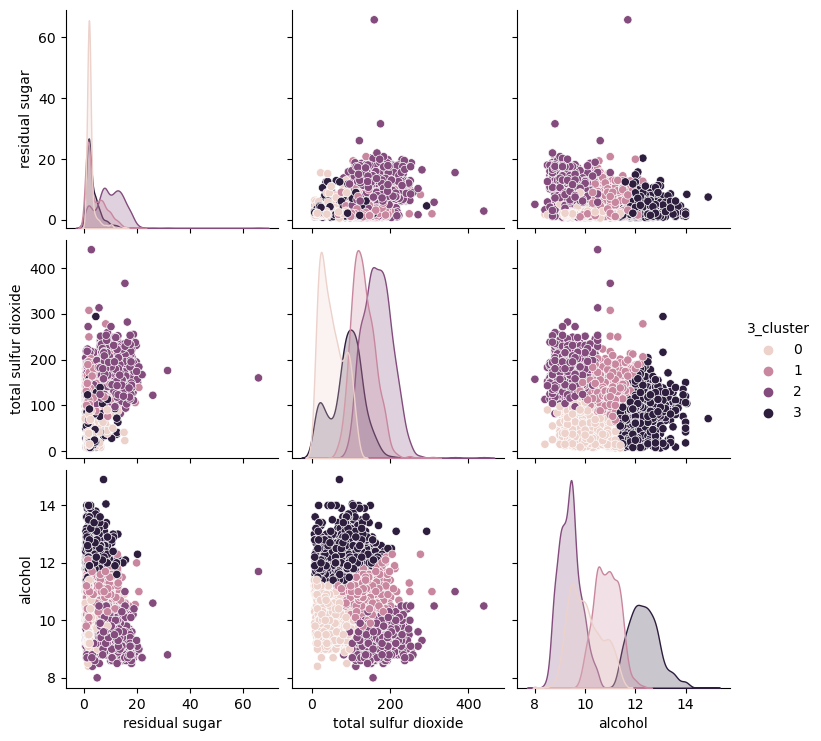

In [50]:
sns.pairplot(X_train_3,  x_vars=['residual sugar', 'total sulfur dioxide', 'alcohol'] , y_vars=['residual sugar', 'total sulfur dioxide', 'alcohol'], hue='3_cluster')

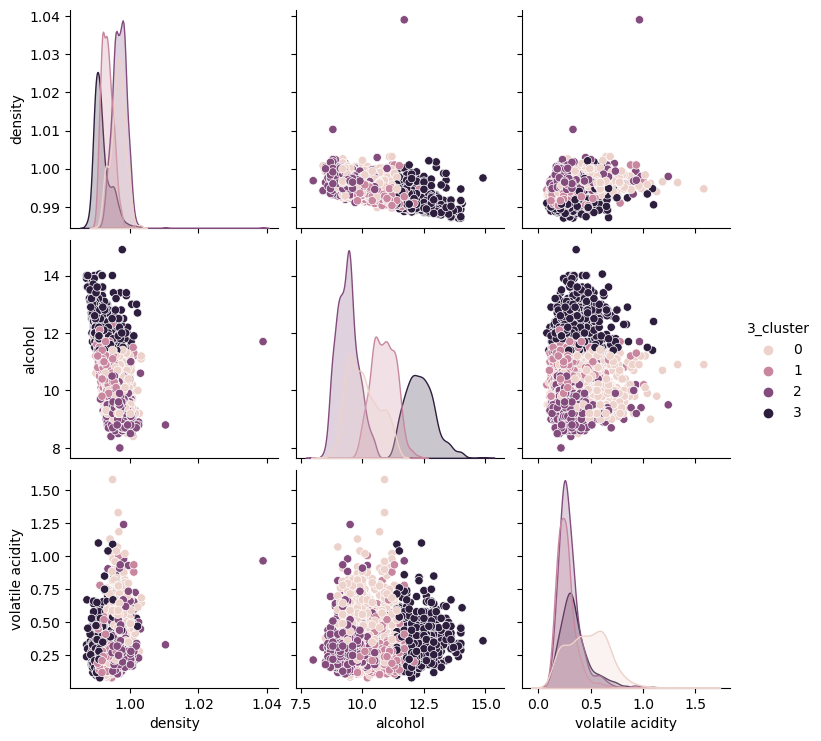

In [51]:
sns.pairplot(X_train_3,  x_vars=['density', 'alcohol', 'volatile acidity'], y_vars=['density', 'alcohol', 'volatile acidity'], hue='3_cluster')

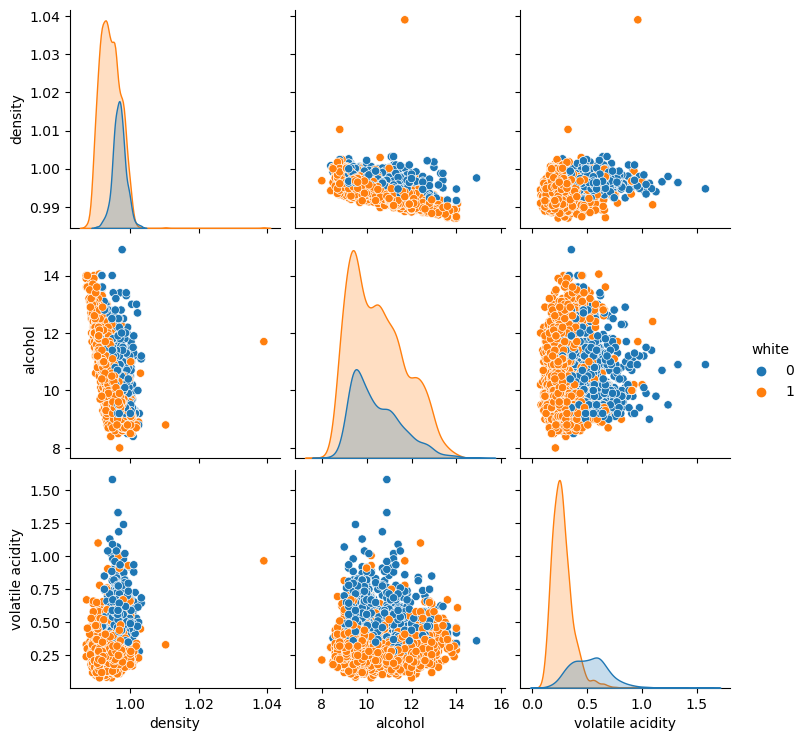

In [52]:
sns.pairplot(X_train_3,  x_vars=['density', 'alcohol', 'volatile acidity'], y_vars=['density', 'alcohol', 'volatile acidity'], hue='white')

In [53]:
X_train_4 = X_train.drop(columns=['2_cluster', '3_cluster'])

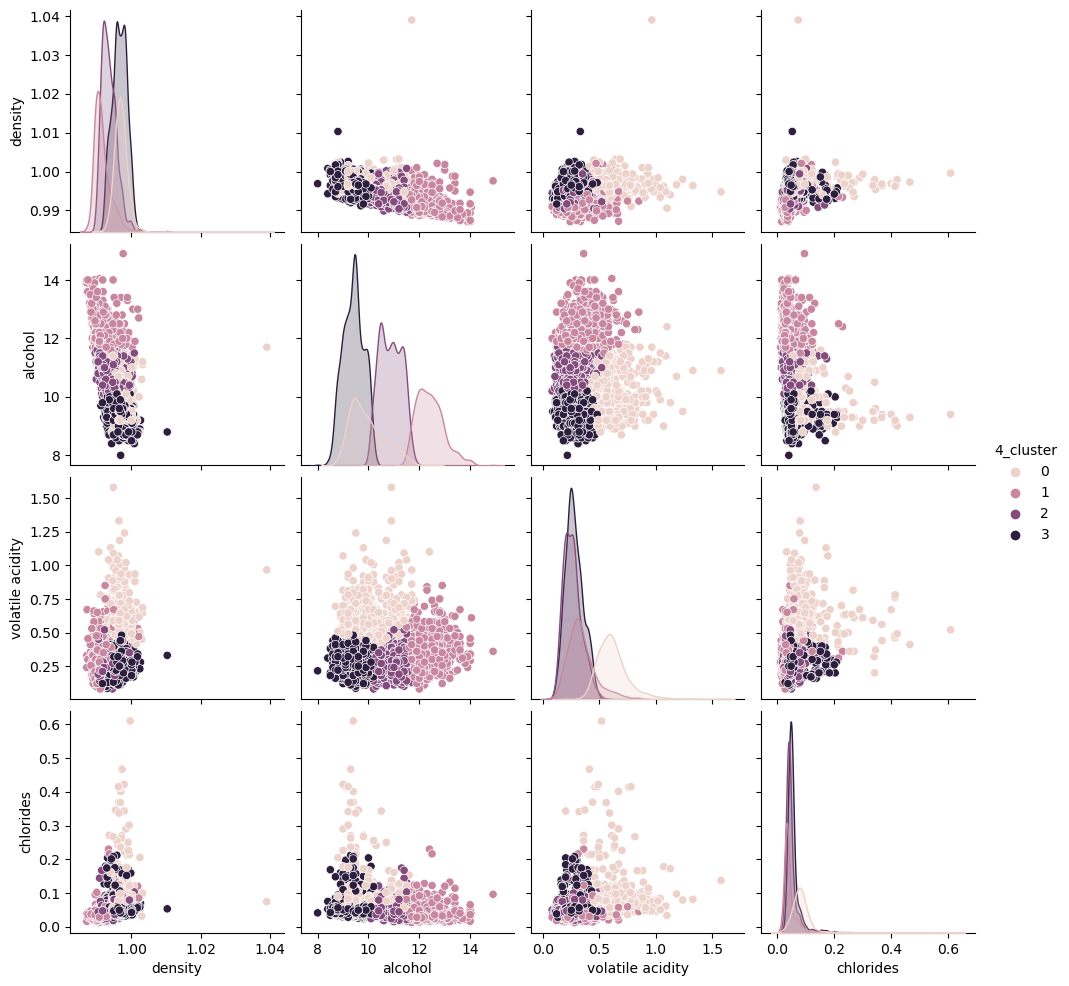

In [54]:
sns.pairplot(X_train_4, x_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], y_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], hue='4_cluster')

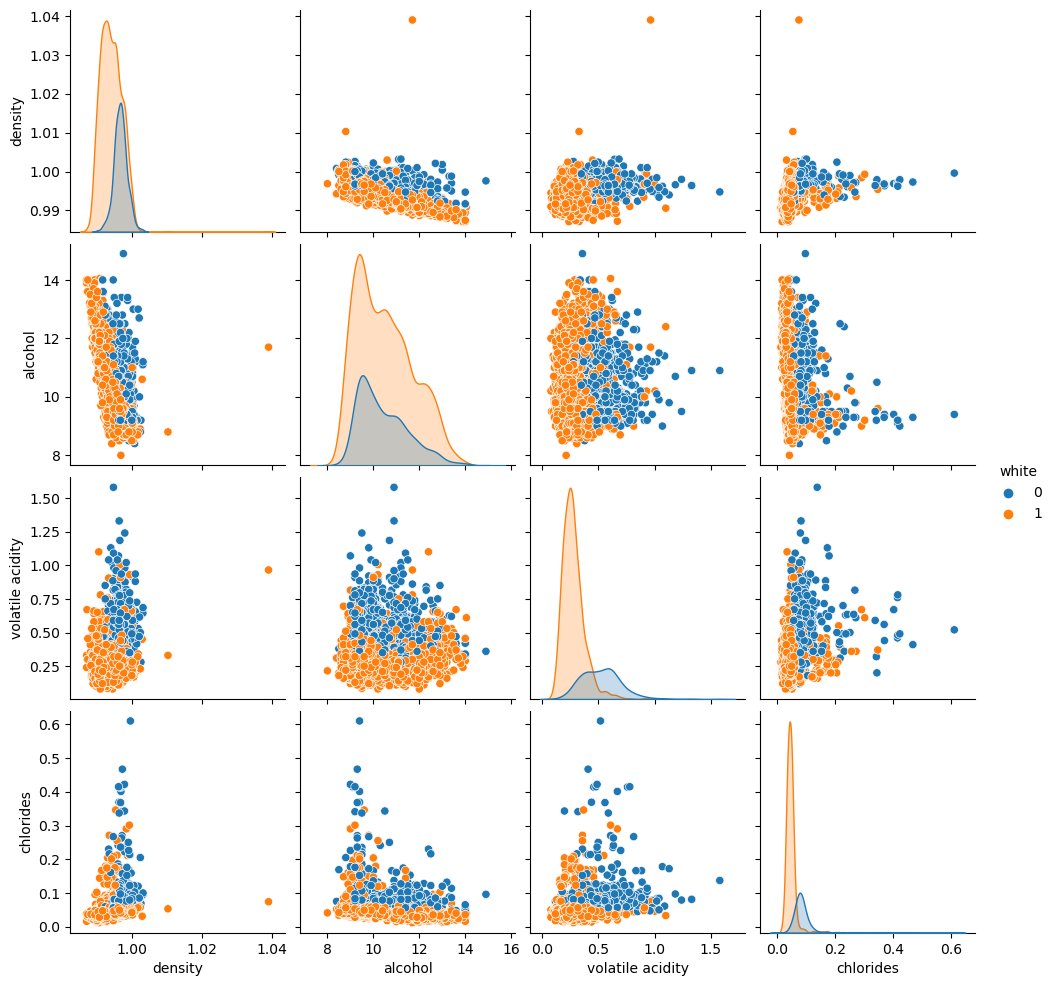

In [55]:
sns.pairplot(X_train_4, x_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], y_vars=['density', 'alcohol', 'volatile acidity', 'chlorides'], hue='white')

In [56]:
x = pd.Series({k: KMeans(k).fit(X_train_2).inertia_ for k in range(2, 12)})
y = pd.Series({k: KMeans(k).fit(X_train_3).inertia_ for k in range(2, 12)})
z = pd.Series({k: KMeans(k).fit(X_train_4).inertia_ for k in range(2, 12)})
x,y,z

NameError: name 'X_train_2' is not defined

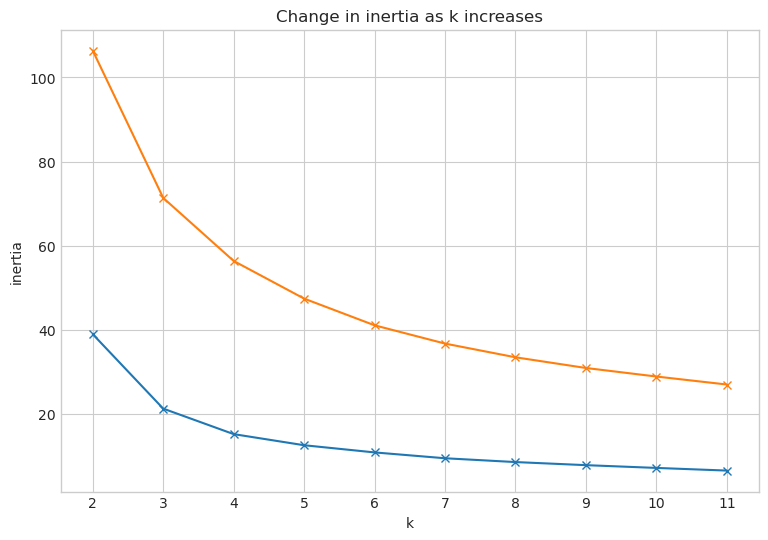

In [57]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol', 'volatile acidity']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    pd.Series({k: KMeans(k).fit(X_train_scaled[['residual sugar', 'alcohol', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

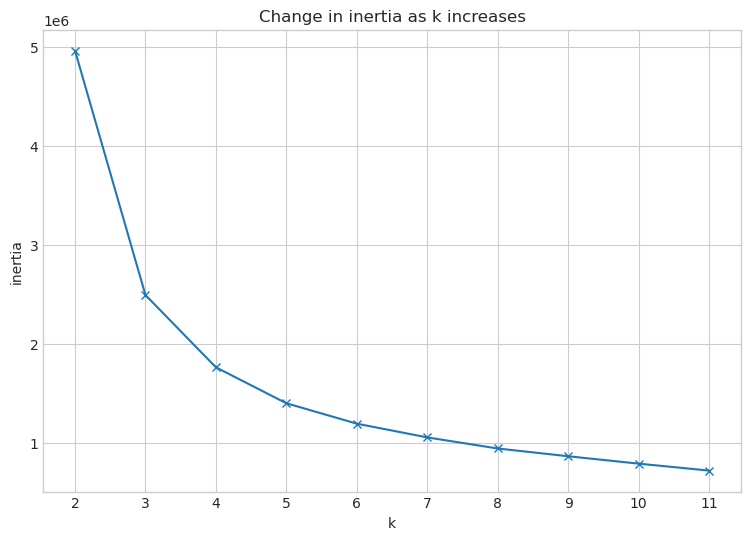

In [58]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

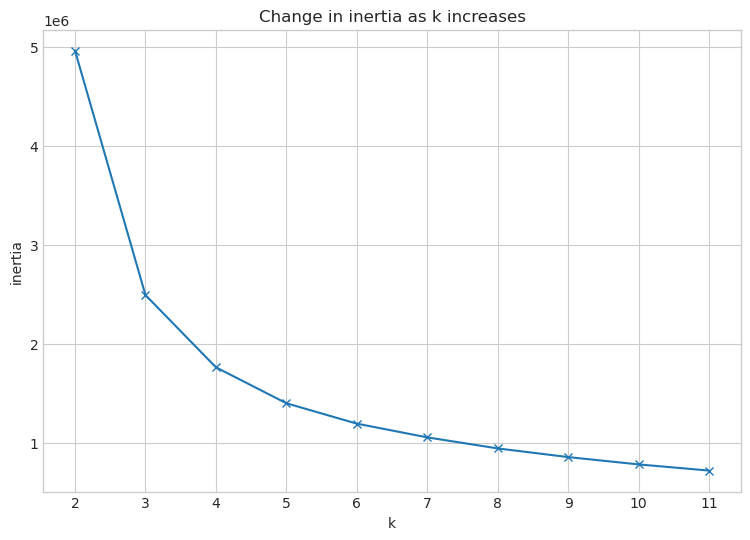

In [59]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_4).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [60]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,1,2
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,3,1,2
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,1,2
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,1,2
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1,2,3
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1,2,3
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1,2,3


In [61]:
feat_to_dummy = ['2_cluster', '3_cluster', '4_cluster']
cluster_dummy_list = []

for feat in feat_to_dummy:
    # creating a dummy column for the current feature
    df_dummies = pd.get_dummies(X_train[feat], drop_first=True)
    
    # Concatenate the original DataFrame and the dummy variables DataFrame
    df = pd.concat([X_train, df_dummies], axis=1)

    # dropping the original feature
    df.drop(columns=feat_to_dummy, inplace=True)
    
    cluster_dummy_list.append(df)

In [62]:
X_train_2, X_train_3, X_train_4 = cluster_dummy_list
X_train_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,1,2,3
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,0,0
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,0,0,1
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,0,0
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,0,0
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1,0,0
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1,0,0
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1,0,0


In [63]:
X_validate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
497,6.8,0.23,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,1,2,3,1
813,6.9,0.39,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,0,3,0,2
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,0,1,2,0
439,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,1,1,0,3
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,9.0,0.24,0.50,1.2,0.048,26.0,107.0,0.99180,3.21,0.34,12.4,1,2,3,1
4522,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,1,0,0,3
1507,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,0,3,0,2
1395,6.9,0.19,0.33,1.6,0.039,27.0,98.0,0.98980,3.09,0.46,12.3,1,2,3,1


In [64]:
X_validate['2_cluster'].value_counts()

1    530
0    406
3    355
2    269
Name: 2_cluster, dtype: int64

In [65]:
feat_to_dummy = ['2_cluster', '3_cluster', '4_cluster']
cluster_dummy_list = []

for feat in feat_to_dummy:
    # creating a dummy column for the current feature
    df_dummies = pd.get_dummies(X_validate[feat], drop_first=True)
    
    # Concatenate the original DataFrame and the dummy variables DataFrame
    df = pd.concat([X_validate, df_dummies], axis=1)

    # dropping the original feature
    df.drop(columns=feat_to_dummy, inplace=True)
    
    cluster_dummy_list.append(df)

In [66]:
X_validate_2, X_validate_3, X_validate_4 = cluster_dummy_list

In [67]:
len(cluster_dummy_list)

3

In [68]:
X_validate_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,1,2,3
497,6.8,0.23,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,1,0,1,0
813,6.9,0.39,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,0,0,0,1
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,0,1,0,0
439,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,1,1,0,0
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,9.0,0.24,0.50,1.2,0.048,26.0,107.0,0.99180,3.21,0.34,12.4,1,0,1,0
4522,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,1,0,0,0
1507,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,0,0,0,1
1395,6.9,0.19,0.33,1.6,0.039,27.0,98.0,0.98980,3.09,0.46,12.3,1,0,1,0


In [69]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,1,2
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,1,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,3,1,2
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,1,2
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,1,2
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,1,2,3
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,1,2,3
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,1,2,3


In [70]:
X_train_3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,1,2,3
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,1,0,0
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,0,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,1,0,0
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,1,0,0
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,1,0,0
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,0,1,0
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,0,1,0
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,0,1,0


In [71]:
X_train_4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,1,2,3
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,0,1,0
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,0,0,0
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,0,1,0
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,0,1,0
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,0,1,0
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,0,0,1
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,0,0,1
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,0,0,1


In [72]:
# turn series into dataframes to append new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

# 1. Predict based on mean
quality_pred_mean = y_train['quality'].mean()
y_train['quality_pred_mean'] = quality_pred_mean
y_validate['quality_pred_mean'] = quality_pred_mean

# 2. Do same for median
quality_pred_median_mvp = y_train['quality'].median()
y_train['quality_pred_median'] = quality_pred_median_mvp
y_validate['quality_pred_median'] = quality_pred_median_mvp

# 3.  RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2)) 

# 4.  RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_median) ** (1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_median) ** (1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.87 
Validate/Out-of-Sample:  0.89
RMSE using Median
Train/In-Sample:  0.89 
Validate/Out-of-Sample:  0.91


In [73]:
# turn series into dataframes to append new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

X_train_2_features = X_train_2_features.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
X_validate_2_features = X_validate_2_features.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
#. Create the model object
lm = LinearRegression()

#. Fit to training and specify column in y_train since it is now a series
lm.fit(X_train_2_features, y_train.quality)

# predict
y_train['quality_pred_lm'] = lm.predict(X_train_2_features)

# RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm) ** (1/2)

# predict validate
y_validate['quality_pred_lm'] = lm.predict(X_validate_2_features)

#Validate RMSE 
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm) ** (1/2)

print('RMSE for OLS using LinearRegression\nTraining/In-Sample: ', rmse_train,
     '\nValidation/Out-of-Sample: ', rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7775639328594863 
Validation/Out-of-Sample:  0.7909186076861902


In [74]:
# turn series into dataframes to append new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

X_train_2 = X_train_2.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
X_validate_2 = X_validate_2.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
#. Create the model object
lm = LinearRegression()

#. Fit to training and specify column in y_train since it is now a series
lm.fit(X_train_2, y_train.quality)

# predict
y_train['quality_pred_lm'] = lm.predict(X_train_2)

# RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm) ** (1/2)

# predict validate
y_validate['quality_pred_lm'] = lm.predict(X_validate_2)

#Validate RMSE 
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm) ** (1/2)

print('RMSE for OLS using LinearRegression\nTraining/In-Sample: ', rmse_train,
     '\nValidation/Out-of-Sample: ', rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7276365808914859 
Validation/Out-of-Sample:  0.7357440886332445


In [75]:
# turn series into dataframes to append new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

X_train_3 = X_train_3.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
X_validate_3 = X_validate_3.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
#. Create the model object
lm = LinearRegression()

#. Fit to training and specify column in y_train since it is now a series
lm.fit(X_train_3, y_train.quality)

# predict
y_train['quality_pred_lm'] = lm.predict(X_train_3)

# RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm) ** (1/2)

# predict validate
y_validate['quality_pred_lm'] = lm.predict(X_validate_3)

#Validate RMSE 
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm) ** (1/2)

print('RMSE for OLS using LinearRegression\nTraining/In-Sample: ', rmse_train,
     '\nValidation/Out-of-Sample: ', rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.728300921198669 
Validation/Out-of-Sample:  0.7381508157759422


In [76]:
# turn series into dataframes to append new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

X_train_4 = X_train_4.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
X_validate_4 = X_validate_4.rename(columns={1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})
#. Create the model object
lm = LinearRegression()

#. Fit to training and specify column in y_train since it is now a series
lm.fit(X_train_4, y_train.quality)

# predict
y_train['quality_pred_lm'] = lm.predict(X_train_4)

# RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm) ** (1/2)

# predict validate
y_validate['quality_pred_lm'] = lm.predict(X_validate_4)

#Validate RMSE 
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm) ** (1/2)

print('RMSE for OLS using LinearRegression\nTraining/In-Sample: ', rmse_train,
     '\nValidation/Out-of-Sample: ', rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7276727560542925 
Validation/Out-of-Sample:  0.7359739335050838


In [77]:
for i in range(0,5):
    # make the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=i)

    # fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train_2)

    # transform X_validate_scaled & X_test_scaled
    X_validate_degree2 = pf.transform(X_validate_2)
    #X_test_degree2_mvp = pf.transform(X_test_mvp)

    # create the model object
    lm2 = LinearRegression()

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm2.fit(X_train_2, y_train.quality)

    # predict train
    y_train['quality_pred_poly'] = lm2.predict(X_train_2)

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_poly)**(1/2)

    # predict validate
    y_validate['quality_pred_poly'] = lm2.predict(X_validate_2)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_poly)**(1/2)

    print("RMSE for Polynomial Model, degrees=", i, "\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees= 0 
Training/In-Sample:  0.7276365808914859 
Validation/Out-of-Sample:  0.7357440886332445
RMSE for Polynomial Model, degrees= 1 
Training/In-Sample:  0.7276365808914859 
Validation/Out-of-Sample:  0.7357440886332445
RMSE for Polynomial Model, degrees= 2 
Training/In-Sample:  0.7276365808914859 
Validation/Out-of-Sample:  0.7357440886332445
RMSE for Polynomial Model, degrees= 3 
Training/In-Sample:  0.7276365808914859 
Validation/Out-of-Sample:  0.7357440886332445
RMSE for Polynomial Model, degrees= 4 
Training/In-Sample:  0.7276365808914859 
Validation/Out-of-Sample:  0.7357440886332445


In [ ]:
X_train_2.columns

In [ ]:
dd